Exercise 13
 This question should be answered using the Weekly data set, which
 is part of the ISLP package. This data is similar in nature to the
 Smarket data from this chapter’s lab, except that it contains 1,089
 weekly returns for 21 years, from the beginning of 1990 to the end of
 2010

Weekly percentage returns for the S&P 500 stock index between 1990 and 2010.

Year: The year that the observation was recorded

Lag1: Percentage return of stock market for previous week

Lag2: Percentage return of stock market for 2 weeks previous

Lag3: Percentage return of stock market for 3 weeks previous

Lag4: Percentage return of stock market for 4 weeks previous

Lag5: Percentage return of stock market for 5 weeks previous

Volume: Volume of shares traded (average number of daily shares traded in billions)

Today: Percentage return of stock market for this week

Direction: A factor with levels ‘Down’ and ‘Up’ indicating whether the stock market had a positive or negative return on a given week.

In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 980.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.5/890.5 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=74e0af044b1d16b71c138512076975817f721d342f3deb130f905c1eb582eb78
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting u

In [2]:
from ISLP import load_data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Load the Boston housing dataset
weekly_df = load_data('Weekly')
weekly_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
weekly_df.dtypes

,0
Year,int64
Lag1,float64
Lag2,float64
Lag3,float64
Lag4,float64
Lag5,float64
Volume,float64
Today,float64
Direction,category


In [4]:

# Convert the 'Direction' column to strings, ensuring the column contains valid string data
weekly_df['Direction'] = weekly_df['Direction'].astype(str)

# Now map the cleaned values to numerical ones
weekly_df['Direction'] = weekly_df['Direction'].map({'Up': 1, 'Down': 0})

# Drop rows with NaN values
weekly_df = weekly_df.dropna()

# Drop duplicate rows
weekly_df = weekly_df.drop_duplicates()

weekly_df.to_csv('cleaned_weekly.csv')

In [5]:
weekly_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


 (a) Produce some numerical and graphical summaries of the Weekly
 data. Do there appear to be any patterns?

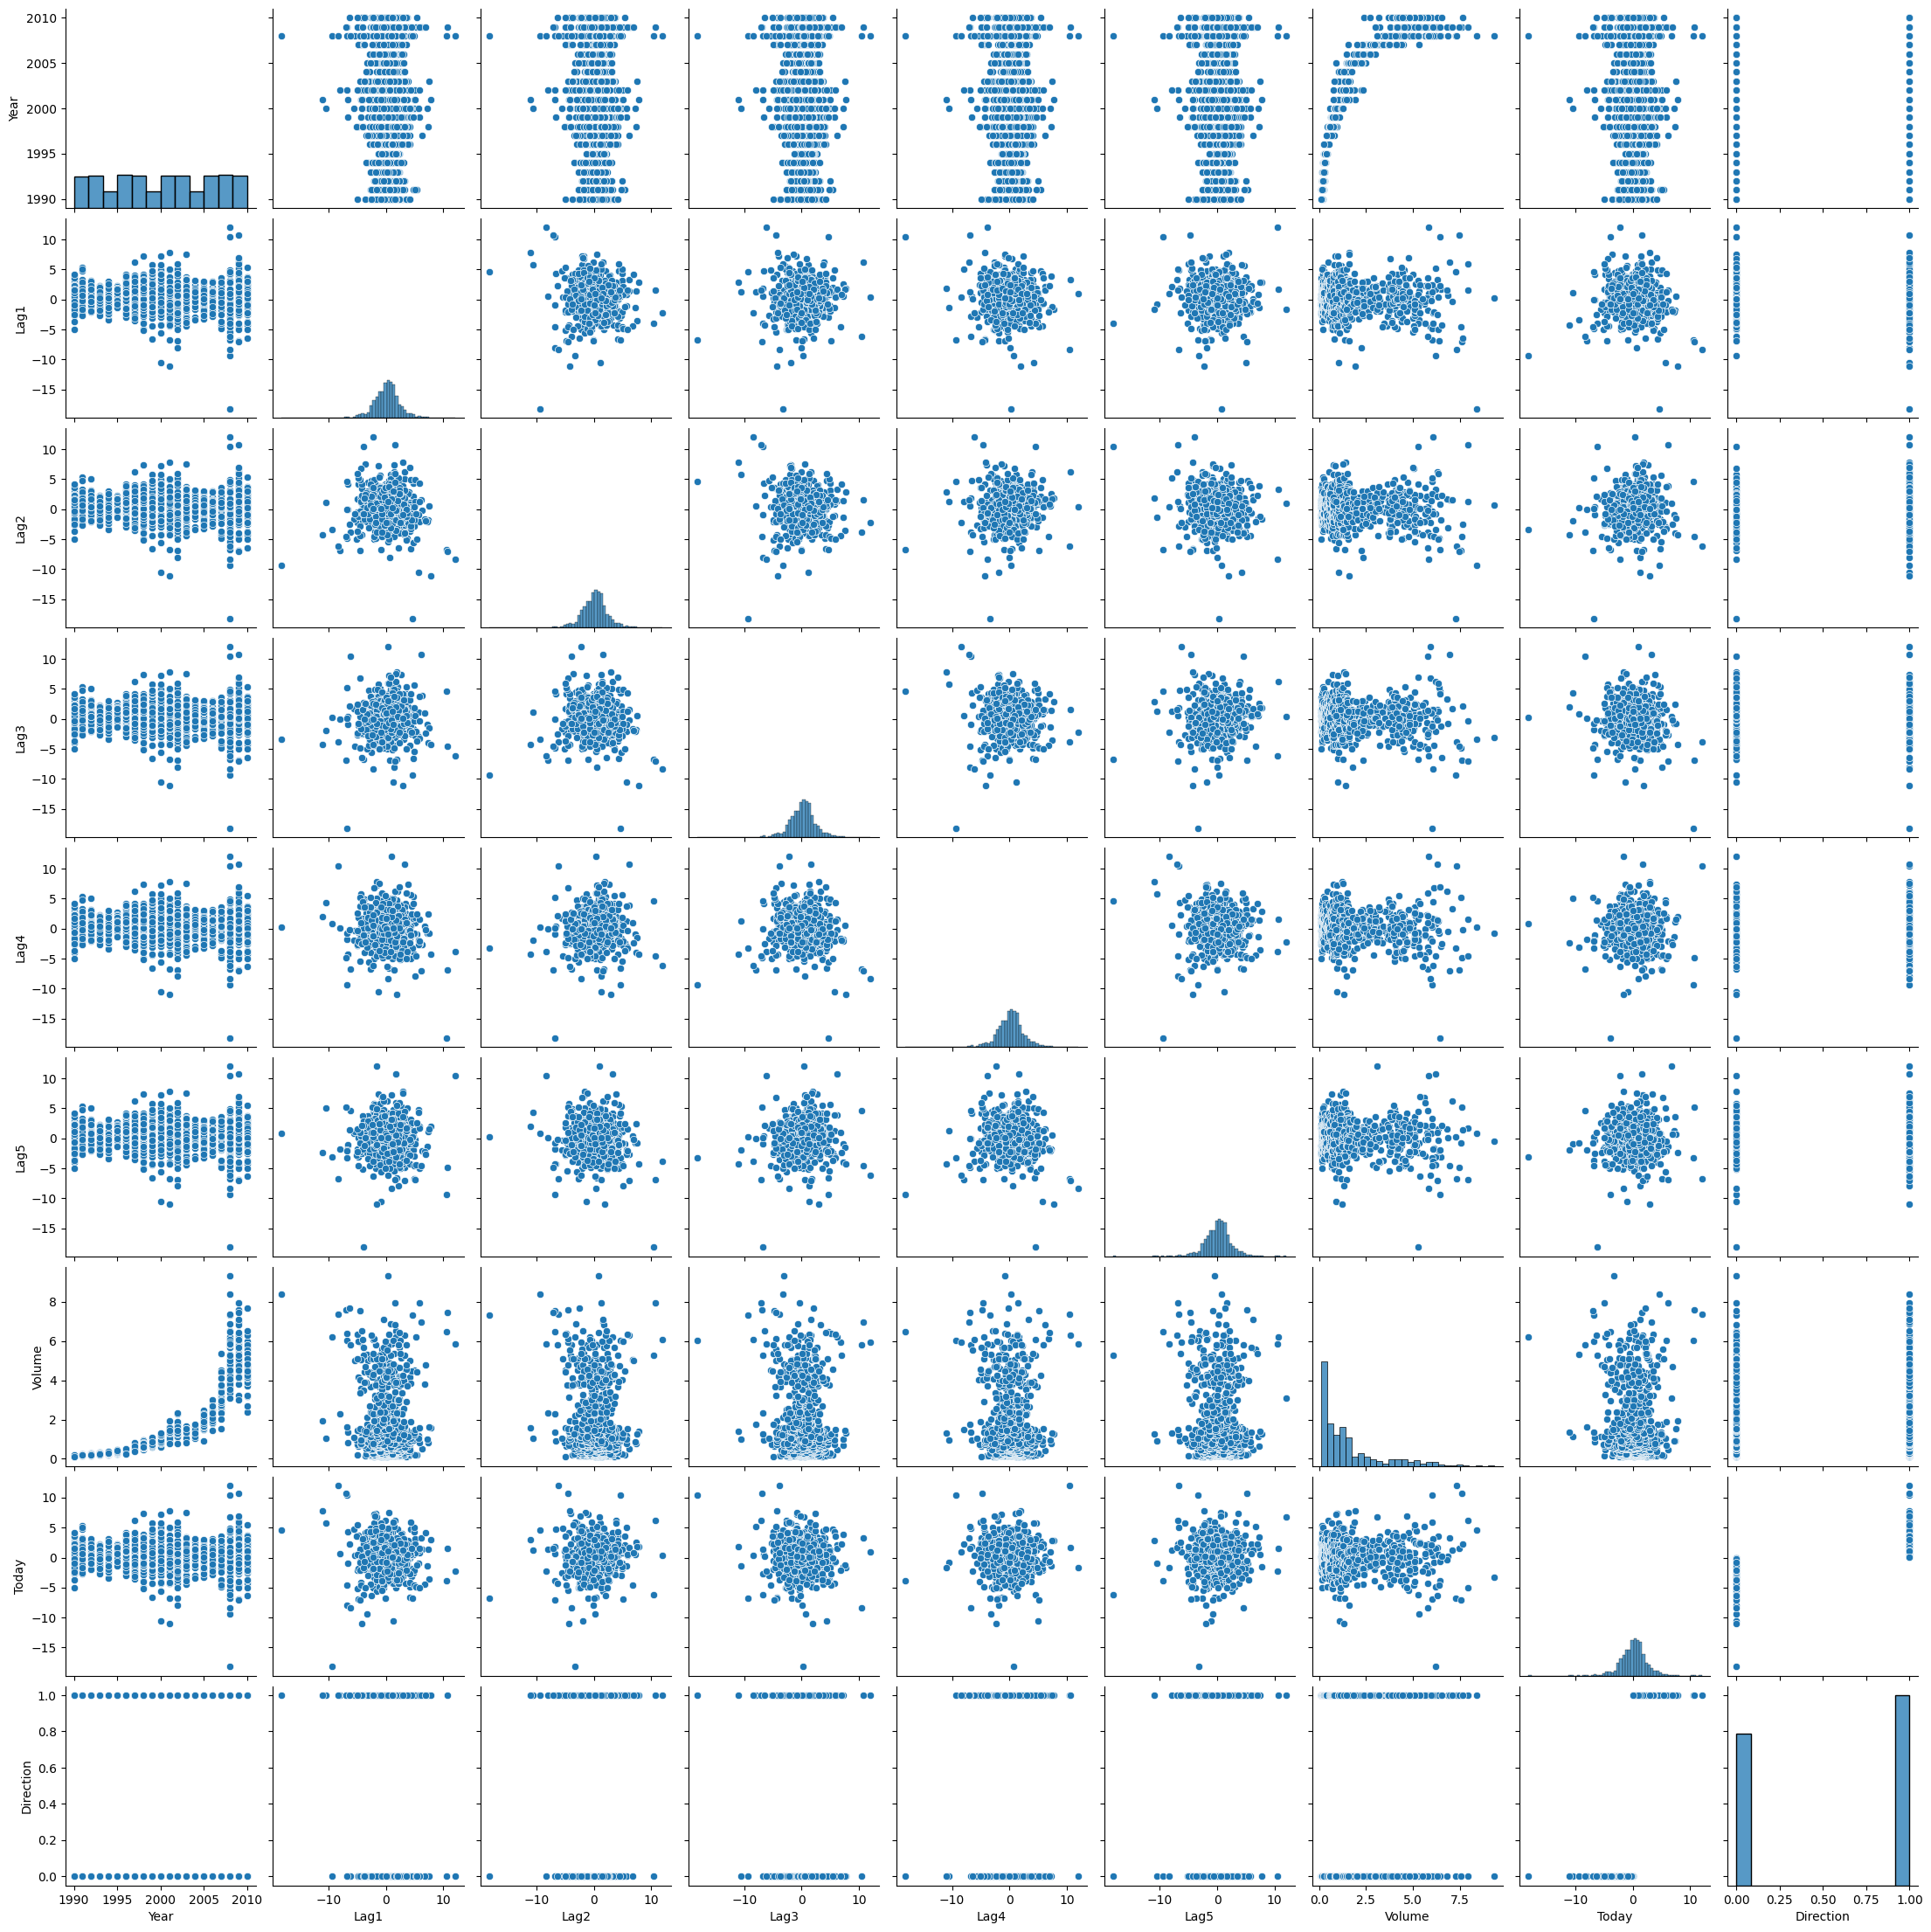

In [6]:

# Pairplot
sns.pairplot(weekly_df);

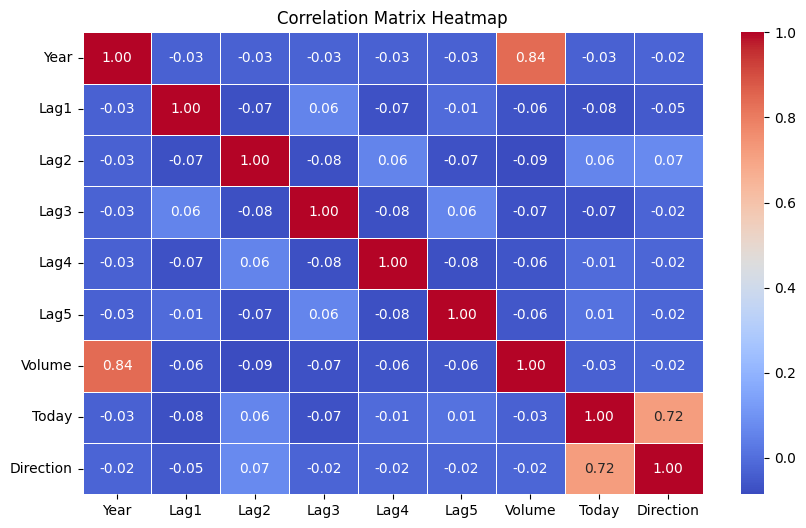

In [7]:

# Compute the correlation matrix
corr_matrix = weekly_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


Today and Direction (0.720):
A strong positive correlation. The current week’s return (Today) directly influences the market direction, with positive returns leading to an "Up" classification and negative returns leading to "Down."

Year and Volume (0.842):
A strong positive correlation. Over time, from 1990 to 2010, trading volume increased, reflecting the market's growth and increased activity.

(b) Use the full data set to perform a logistic regression with
 Direction as the response and the five lag variables plus Volume
 as predictors. Use the summary function to print the results. Do
 any of the predictors appear to be statistically significant? If so,
 which ones?

In [8]:
weekly_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [9]:
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

X = weekly_df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X = sm.add_constant(X, prepend=True)
y = weekly_df['Direction']

model = Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                0.006580
Time:                        04:18:15   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

Based on the logistic regression summary, Lag2 appears to be the only variable that is statistically significant because its p value is smaller than 0.05

 (c) Compute the confusion matrix and overall fraction of correct
 predictions. Explain what the confusion matrix is telling you
 about the types of mistakes made by logistic regression.

In [10]:
# Get the confusion matrix
conf_matrix = result.pred_table(threshold=0.5)

# Extract individual elements from the confusion matrix
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
FN = conf_matrix[1, 0]  # False Negative
TP = conf_matrix[1, 1]  # True Positive

# Calculate the total number of predictions
total = TN + FP + FN + TP

# Calculate overall accuracy
accuracy = (TP + TN) / total

# Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# False Positive Rate (FPR)
fpr = FP / (TN + FP)

# False Negative Rate (FNR)
fnr = FN / (TP + FN)

# Print the confusion matrix and percentages
print("\t\t Confusion Matrix")
print("\t Down  Up (Predicted)")
print(f"Down \t [{TN}   {FP}]")
print(f"Up \t [{FN}   {TP}]")

# Print the calculated metrics
print("\nMetrics:")
print(f"Overall Accuracy: {accuracy:.2f}")
print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"False Positive Rate: {fpr:.2f}")
print(f"False Negative Rate: {fnr:.2f}")


		 Confusion Matrix
	 Down  Up (Predicted)
Down 	 [54.0   430.0]
Up 	 [48.0   557.0]

Metrics:
Overall Accuracy: 0.56
Sensitivity (True Positive Rate): 0.92
Specificity (True Negative Rate): 0.11
False Positive Rate: 0.89
False Negative Rate: 0.08


True Negative (TN): Correctly predicted "Down" as "Down".

False Positive (FP): Incorrectly predicted "Up" when it was actually "Down".

False Negative (FN): Incorrectly predicted "Down" when it was actually "Up".

True Positive (TP): Correctly predicted "Up" as "Up".

Based on the results of the confusion matrix, in general we predicted the weekly trend correctly 56% of the time. However, we correctly predicted when the trend would go up 92% of the time, while only correctly predicting when it would go down 11% of the time.

 (d) Now fit the logistic regression model using a training data period
 from 1990 to 2008, with Lag2 as the only predictor. Compute the
 confusion matrix and the overall fraction of correct predictions
 for the held out data (that is, the data from 2009 and 2010).

In [11]:
train = weekly_df.loc[weekly_df['Year'] <= 2008]
test = weekly_df.loc[weekly_df['Year'] >= 2009]

X = train[['Lag2']]
X = sm.add_constant(X, prepend=True)
y = train['Direction']

model = Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                0.003076
Time:                        04:18:15   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Prepare the test data
X_test = test[['Lag2']]
X_test = sm.add_constant(X_test, prepend=True)
y_test = test['Direction']

# Make predictions
predictions = result.predict(X_test) > 0.5  # True if probability is greater than 0.5

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Extract individual elements from the confusion matrix
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
FN = conf_matrix[1, 0]  # False Negative
TP = conf_matrix[1, 1]  # True Positive

# Calculate overall accuracy
accuracy = accuracy_score(y_test, predictions)

# Calculate sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate false positive rate
false_positive_rate = FP / (TN + FP)

# Calculate true positive rate (which is the same as sensitivity)
true_positive_rate = sensitivity

# Print the confusion matrix and metrics
print("\t\t Confusion Matrix")
print("\t Down  Up (Predicted)")
print(f"Down \t [{TN}   {FP}]")
print(f"Up \t [{FN}   {TP}]")

# Print overall metrics
print("\nMetrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")


		 Confusion Matrix
	 Down  Up (Predicted)
Down 	 [9   34]
Up 	 [5   56]

Metrics:
Overall Accuracy: 0.6250
Sensitivity (True Positive Rate): 0.9180
Specificity (True Negative Rate): 0.2093


When spliting up the whole Weekly dataset into a training and test dataset, the model correctly predicted weekly trends at rate of 62.5%, which is a moderate improvement from the model that utilized the whole dataset. Also this model such as the previous one did better at predicting upward trends(91.80%) compared to downward trends(20.93%); although this model was able to improve significantly on correctly predicting downward trends.


 (e) Repeat (d) using LDA.

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(train[['Lag2']], train['Direction'])
y_predict = clf_lda.predict(test[['Lag2']])

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_true = test['Direction']

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_predict)

# Extract individual elements from the confusion matrix
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
FN = conf_matrix[1, 0]  # False Negative
TP = conf_matrix[1, 1]  # True Positive

# Calculate the total number of predictions
total = TN + FP + FN + TP

# Calculate overall accuracy
accuracy = (TP + TN) / total

# Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Print the confusion matrix
print("\t\t Confusion Matrix")
print("\t Down  Up (Predicted)")
print(f"Down \t [{TN}   {FP}]")
print(f"Up \t [{FN}   {TP}]")

# Print the calculated metrics
print("\nMetrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")


		 Confusion Matrix
	 Down  Up (Predicted)
Down 	 [9   34]
Up 	 [5   56]

Metrics:
Overall Accuracy: 0.6250
Sensitivity (True Positive Rate): 0.92
Specificity (True Negative Rate): 0.21


Using Linear Discriminant Analysis to develop a classifying model yielded similar results as the logistic regression model created in part D.

 (f) Repeat (d) using QDA.

In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf_qda = QuadraticDiscriminantAnalysis()
clf_qda.fit(train[['Lag2']], train['Direction'])
y_predict = clf_qda.predict(test[['Lag2']])


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_true = test['Direction']

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_predict)

# Extract individual elements from the confusion matrix
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
FN = conf_matrix[1, 0]  # False Negative
TP = conf_matrix[1, 1]  # True Positive

# Calculate the total number of predictions
total = TN + FP + FN + TP

# Calculate overall accuracy
accuracy = (TP + TN) / total

# Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# False Positive Rate (FPR)
fpr = FP / (TN + FP)

# True Positive Rate (same as Sensitivity)
tpr = sensitivity

# Print the confusion matrix
print("\t\t Confusion Matrix")
print("\t Down  Up (Predicted)")
print(f"Down \t [{TN}   {FP}]")
print(f"Up \t [{FN}   {TP}]")

# Print the calculated metrics
print("\nMetrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")


		 Confusion Matrix
	 Down  Up (Predicted)
Down 	 [0   43]
Up 	 [0   61]

Metrics:
Overall Accuracy: 0.5865
Sensitivity (True Positive Rate): 1.00
Specificity (True Negative Rate): 0.00


Quadratic Linear Analysis created a model with an accuracy of 59%, which is lower than the previous methods. Also this model only considered predicting the correctness of weekly upward trends disregarding the downward weekly trends.

 (g) Repeat (d) using KNN with K = 1.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(train[['Lag2']], train['Direction'])
y_predict = clf_knn.predict(test[['Lag2']])


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_true = test['Direction']

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_predict)

# Extract individual elements from the confusion matrix
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
FN = conf_matrix[1, 0]  # False Negative
TP = conf_matrix[1, 1]  # True Positive

# Calculate the total number of predictions
total = TN + FP + FN + TP

# Calculate overall accuracy
accuracy = (TP + TN) / total

# Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# False Positive Rate (FPR)
fpr = FP / (TN + FP)

# True Positive Rate (same as Sensitivity)
tpr = sensitivity

# Print the confusion matrix
print("\t\t Confusion Matrix")
print("\t Down  Up (Predicted)")
print(f"Down \t [{TN}   {FP}]")
print(f"Up \t [{FN}   {TP}]")

# Print the calculated metrics
print("\nMetrics:")
print(f"Overall Accuracy: {accuracy:.2f}")
print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")


		 Confusion Matrix
	 Down  Up (Predicted)
Down 	 [22   21]
Up 	 [32   29]

Metrics:
Overall Accuracy: 0.49
Sensitivity (True Positive Rate): 0.48
Specificity (True Negative Rate): 0.51


The K-Nearest neighbors resulted in a classifying model with an accuracy rate of nearly 50% which is equal to random chance

 (h) Repeat (d) using naive Bayes.

In [19]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the Naive Bayes classifier on the training data
naive_bayes.fit(train[['Lag2']], train['Direction'])

# Predict the trend for the test data
y_predict = naive_bayes.predict(test[['Lag2']])

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_true = test['Direction']

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_predict)

# Extract individual elements from the confusion matrix
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
FN = conf_matrix[1, 0]  # False Negative
TP = conf_matrix[1, 1]  # True Positive

# Calculate the total number of predictions
total = TN + FP + FN + TP

# Calculate overall accuracy
accuracy = (TP + TN) / total

# Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# False Positive Rate (FPR)
fpr = FP / (TN + FP)

# True Positive Rate (same as Sensitivity)
tpr = sensitivity

# Print the confusion matrix
print("\t\t Confusion Matrix")
print("\t Down  Up (Predicted)")
print(f"Down \t [{TN}   {FP}]")
print(f"Up \t [{FN}   {TP}]")

# Print the calculated metrics
print("\nMetrics:")
print(f"Overall Accuracy: {accuracy:.2f}")
print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")


		 Confusion Matrix
	 Down  Up (Predicted)
Down 	 [0   43]
Up 	 [0   61]

Metrics:
Overall Accuracy: 0.59
Sensitivity (True Positive Rate): 1.00
Specificity (True Negative Rate): 0.00


After fitting a naive Bayes model to the Weekly data set, we can see that it produced the exact same results as the QDA model we fit in part (f). Both models had an accuracy of 59%, which is still lower than the 62.5% acheived by the logistic regression model.

 (i) Which of these methods appears to provide the best results on
 this data?

If we are only considering overall prediction accuracy, it appears that logistic regression and linear discriminant analysis were equally good as the models that performed the best on this data. Quadratic discriminant analysis came in third place, and  k
 -nearest neighbors with  k=1
  a distant fourth. As noted above in Part 7,  k
 -nearest neighbors didn't perform any better than randomly guessing, and in fact performed worse than naively predicting every week would be an up week. One thing that I would be cautious of, though, is the fact that aside from KNN, the other three models very strongly preferred to predict up weeks, and therefore had high false positive rates. This might be okay for an investor who is comfortable with taking more risks and has can afford losing money to down weeks that were incorrectly predicted to be up weeks, but a risk-averse investor at least require a higher probability threshold than 50% before accepting a prediction of an up week.

 (j) Experiment with different combinations of predictors, includ
ing possible transformations and interactions, for each of the
 methods. Report the variables, method, and associated confu
sion matrix that appears to provide the best results on the held
 out data. Note that you should also experiment with values for
 K in the KNN classifier

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Assume the data is in `weekly_df`
train = weekly_df.loc[weekly_df['Year'] <= 2008]
test = weekly_df.loc[weekly_df['Year'] >= 2009]


In [30]:

# Training variables
X_train = train[['Lag1', 'Lag2' , 'Lag3' , 'Lag4' , 'Lag5' , 'Volume']].copy()
X_test = test[['Lag1', 'Lag2' , 'Lag3' , 'Lag4' , 'Lag5' , 'Volume']].copy()

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']

# Logistic Regression Model
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_pred_logit = logit_model.predict(X_test)

# Confusion Matrix and Accuracy for Logistic Regression
conf_matrix_logit = confusion_matrix(y_test, y_pred_logit)
accuracy_logit = accuracy_score(y_test, y_pred_logit)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_logit)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_logit * 100))


Logistic Regression Confusion Matrix:
 [[31 12]
 [44 17]]
Logistic Regression Accuracy: 46.15%


In [28]:

# Training variables
X_train = train[['Lag1', 'Lag2']].copy()
X_test = test[['Lag1', 'Lag2']].copy()

# Create a new feature
X_train.loc[:,'Lag1_Lag2_Product'] = X_train['Lag1'] * X_train['Lag2']
X_test.loc[:,'Lag1_Lag2_Product'] = X_test['Lag1'] * X_test['Lag2']

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']

# Logistic Regression Model
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_pred_logit = logit_model.predict(X_test)

# Confusion Matrix and Accuracy for Logistic Regression
conf_matrix_logit = confusion_matrix(y_test, y_pred_logit)
accuracy_logit = accuracy_score(y_test, y_pred_logit)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_logit)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_logit * 100))


Logistic Regression Confusion Matrix:
 [[ 7 36]
 [ 8 53]]
Logistic Regression Accuracy: 57.69%


In [31]:

# Training variables
X_train = train[['Lag1', 'Lag2']].copy()
X_test = test[['Lag1', 'Lag2']].copy()

# Create a new feature
X_train.loc[:,'Lag1_Lag2_Product'] = X_train['Lag1'] * X_train['Lag2']
X_test.loc[:,'Lag1_Lag2_Product'] = X_test['Lag1'] * X_test['Lag2']
X_train.loc[:,'Log_Volume'] = np.log(train['Volume'].copy())
X_test.loc[:,'Log_Volume'] = np.log(test['Volume'].copy())

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']

# Logistic Regression Model
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_pred_logit = logit_model.predict(X_test)

# Confusion Matrix and Accuracy for Logistic Regression
conf_matrix_logit = confusion_matrix(y_test, y_pred_logit)
accuracy_logit = accuracy_score(y_test, y_pred_logit)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_logit)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_logit * 100))


Logistic Regression Confusion Matrix:
 [[20 23]
 [18 43]]
Logistic Regression Accuracy: 60.58%


In [50]:

# Training variables
X_train = train[['Lag2']].copy()
X_test = test[['Lag2']].copy()

# Create a new feature
X_train.loc[:, 'Lag2_squared'] = X_train['Lag2'] ** 2
X_test.loc[:, 'Lag2_squared'] = X_test['Lag2'] ** 2

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']

# Logistic Regression Model
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_pred_logit = logit_model.predict(X_test)

# Confusion Matrix and Accuracy for Logistic Regression
conf_matrix_logit = confusion_matrix(y_test, y_pred_logit)
accuracy_logit = accuracy_score(y_test, y_pred_logit)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_logit)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_logit * 100))


Logistic Regression Confusion Matrix:
 [[ 8 35]
 [ 4 57]]
Logistic Regression Accuracy: 62.50%


In [33]:
# Training variables
X_train = train[['Lag1', 'Lag2']].copy()
X_test = test[['Lag1', 'Lag2']].copy()

# Create a new feature
X_train.loc[:, 'Lag1_squared'] = X_train['Lag1'] ** 2
X_test.loc[:, 'Lag1_squared'] = X_test['Lag1'] ** 2

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']

# LDA Model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_test)

# Confusion Matrix and Accuracy for LDA
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("LDA Confusion Matrix:\n", conf_matrix_lda)
print("LDA Accuracy: {:.2f}%".format(accuracy_lda * 100))


LDA Confusion Matrix:
 [[ 6 37]
 [ 6 55]]
LDA Accuracy: 58.65%


In [34]:
# Training variables
X_train = train[['Lag1', 'Lag2']].copy()
X_test = test[['Lag1', 'Lag2']].copy()

# Create a new feature
X_train.loc[:, 'Lag1_squared'] = X_train['Lag1'] ** 2
X_test.loc[:, 'Lag1_squared'] = X_test['Lag1'] ** 2
X_train.loc[:,'Lag1_Lag2_Product'] = X_train['Lag1'] * X_train['Lag2']
X_test.loc[:,'Lag1_Lag2_Product'] = X_test['Lag1'] * X_test['Lag2']
X_train.loc[:,'Log_Volume'] = np.log(train['Volume'].copy())
X_test.loc[:,'Log_Volume'] = np.log(test['Volume'].copy())

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']

# LDA Model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_test)

# Confusion Matrix and Accuracy for LDA
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("LDA Confusion Matrix:\n", conf_matrix_lda)
print("LDA Accuracy: {:.2f}%".format(accuracy_lda * 100))


LDA Confusion Matrix:
 [[21 22]
 [22 39]]
LDA Accuracy: 57.69%


In [35]:
# Training variables
X_train = train[[ 'Lag2']].copy()
X_test = test[['Lag2']].copy()

# Create a new feature
X_train.loc[:, 'Lag2_squared'] = X_train['Lag2'] ** 2
X_test.loc[:, 'Lag2_squared'] = X_test['Lag2'] ** 2

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']

# LDA Model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_test)

# Confusion Matrix and Accuracy for LDA
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("LDA Confusion Matrix:\n", conf_matrix_lda)
print("LDA Accuracy: {:.2f}%".format(accuracy_lda * 100))


LDA Confusion Matrix:
 [[ 7 36]
 [ 4 57]]
LDA Accuracy: 61.54%


In [36]:
# Training variables
X_train = train[['Lag1', 'Volume']].copy()
X_test = test[['Lag1', 'Volume']].copy()

# Create a new feature
X_train.loc[:, 'Lag1_squared'] = X_train['Lag1'] ** 2
X_test.loc[:, 'Lag1_squared'] = X_test['Lag1'] ** 2
X_train.loc[:, 'Volume_tetra'] = X_train['Volume'] ** 4
X_test.loc[:, 'Volume_tetra'] = X_test['Volume'] ** 4

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']

# QDA Model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
y_pred_qda = qda_model.predict(X_test)

# Confusion Matrix and Accuracy for QDA
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print("QDA Confusion Matrix:\n", conf_matrix_qda)
print("QDA Accuracy: {:.2f}%".format(accuracy_qda * 100))


QDA Confusion Matrix:
 [[30 13]
 [38 23]]
QDA Accuracy: 50.96%


In [38]:
# Training variables
X_train = train[['Lag1', 'Lag2', 'Volume']].copy()
X_test = test[['Lag1', 'Lag2', 'Volume']].copy()

# Create a new feature
X_train.loc[:, 'Lag1_squared'] = X_train['Lag1'] ** 2
X_test.loc[:, 'Lag1_squared'] = X_test['Lag1'] ** 2
X_train.loc[:, 'Lag2_squared'] = X_train['Lag2'] ** 2
X_test.loc[:, 'Lag2_squared'] = X_test['Lag2'] ** 2
X_train.loc[:, 'Volume_tetra'] = X_train['Volume'] ** 4
X_test.loc[:, 'Volume_tetra'] = X_test['Volume'] ** 4
X_train.loc[:,'Log_Volume'] = np.log(train['Volume'].copy())
X_test.loc[:,'Log_Volume'] = np.log(test['Volume'].copy())

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']

# QDA Model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
y_pred_qda = qda_model.predict(X_test)

# Confusion Matrix and Accuracy for QDA
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print("QDA Confusion Matrix:\n", conf_matrix_qda)
print("QDA Accuracy: {:.2f}%".format(accuracy_qda * 100))


QDA Confusion Matrix:
 [[29 14]
 [36 25]]
QDA Accuracy: 51.92%


In [49]:
# Training variables
X_train = train[['Lag2']].copy()
X_test = test[['Lag2']].copy()

# Create a new feature
X_train.loc[:, 'Lag2_squared'] = X_train['Lag2'] ** 2
X_test.loc[:, 'Lag2_squared'] = X_test['Lag2'] ** 2

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']

# QDA Model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
y_pred_qda = qda_model.predict(X_test)

# Confusion Matrix and Accuracy for QDA
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print("QDA Confusion Matrix:\n", conf_matrix_qda)
print("QDA Accuracy: {:.2f}%".format(accuracy_qda * 100))


QDA Confusion Matrix:
 [[ 7 36]
 [ 3 58]]
QDA Accuracy: 62.50%


In [55]:


# Extracting values from the confusion matrix
TN = conf_matrix_qda[0, 0]  # True Negative
FP = conf_matrix_qda[0, 1]  # False Positive
FN = conf_matrix_qda[1, 0]  # False Negative
TP = conf_matrix_qda[1, 1]  # True Positive

# Calculating Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculating Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Printing the results

print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")


Sensitivity (True Positive Rate): 0.95
Specificity (True Negative Rate): 0.16


In [39]:
# Training variables
X_train = train[['Lag1', 'Lag2']].copy()
X_test = test[['Lag1', 'Lag2']].copy()

# Create a new feature
X_train.loc[:,'Lag1_Lag2_Product'] = X_train['Lag1'] * X_train['Lag2']
X_test.loc[:,'Lag1_Lag2_Product'] = X_test['Lag1'] * X_test['Lag2']

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']


best_k = None
best_accuracy_knn = 0
best_conf_matrix_knn = None

# Experiment with different K values
for k in range(1,21):  # Trying K from 1 to 20
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)

    # Calculate accuracy and confusion matrix
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

    # Track the best K
    if accuracy_knn > best_accuracy_knn:
        best_k = k
        best_accuracy_knn = accuracy_knn
        best_conf_matrix_knn = conf_matrix_knn

print(f"Best K for KNN: {best_k}")
print("Best KNN Confusion Matrix:\n", best_conf_matrix_knn)
print("Best KNN Accuracy: {:.2f}%".format(best_accuracy_knn * 100))


Best K for KNN: 19
Best KNN Confusion Matrix:
 [[18 25]
 [21 40]]
Best KNN Accuracy: 55.77%


In [40]:
# Training variables
X_train = train[['Lag2']].copy()
X_test = test[['Lag2']].copy()

# Create a new feature
X_train.loc[:,'Log_Volume'] = np.log(train['Volume'].copy())
X_test.loc[:,'Log_Volume'] = np.log(test['Volume'].copy())

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']


best_k = None
best_accuracy_knn = 0
best_conf_matrix_knn = None

# Experiment with different K values
for k in range(1,21):  # Trying K from 1 to 20
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)

    # Calculate accuracy and confusion matrix
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

    # Track the best K
    if accuracy_knn > best_accuracy_knn:
        best_k = k
        best_accuracy_knn = accuracy_knn
        best_conf_matrix_knn = conf_matrix_knn

print(f"Best K for KNN: {best_k}")
print("Best KNN Confusion Matrix:\n", best_conf_matrix_knn)
print("Best KNN Accuracy: {:.2f}%".format(best_accuracy_knn * 100))


Best K for KNN: 3
Best KNN Confusion Matrix:
 [[28 15]
 [28 33]]
Best KNN Accuracy: 58.65%


In [41]:
# Training variables
X_train = train[['Lag2']].copy()
X_test = test[['Lag2']].copy()


# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']


best_k = None
best_accuracy_knn = 0
best_conf_matrix_knn = None

# Experiment with different K values
for k in range(1,21):  # Trying K from 1 to 20
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)

    # Calculate accuracy and confusion matrix
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

    # Track the best K
    if accuracy_knn > best_accuracy_knn:
        best_k = k
        best_accuracy_knn = accuracy_knn
        best_conf_matrix_knn = conf_matrix_knn

print(f"Best K for KNN: {best_k}")
print("Best KNN Confusion Matrix:\n", best_conf_matrix_knn)
print("Best KNN Accuracy: {:.2f}%".format(best_accuracy_knn * 100))


Best K for KNN: 20
Best KNN Confusion Matrix:
 [[23 20]
 [22 39]]
Best KNN Accuracy: 59.62%


In [51]:
# Training variables
X_train = train[['Lag2']].copy()
X_test = test[['Lag2']].copy()

# Create a new feature
X_train.loc[:, 'Lag2_squared'] = X_train['Lag2'] ** 2
X_test.loc[:, 'Lag2_squared'] = X_test['Lag2'] ** 2

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']


best_k = None
best_accuracy_knn = 0
best_conf_matrix_knn = None

# Experiment with different K values
for k in range(1,21):  # Trying K from 1 to 20
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)

    # Calculate accuracy and confusion matrix
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

    # Track the best K
    if accuracy_knn > best_accuracy_knn:
        best_k = k
        best_accuracy_knn = accuracy_knn
        best_conf_matrix_knn = conf_matrix_knn

print(f"Best K for KNN: {best_k}")
print("Best KNN Confusion Matrix:\n", best_conf_matrix_knn)
print("Best KNN Accuracy: {:.2f}%".format(best_accuracy_knn * 100))


Best K for KNN: 13
Best KNN Confusion Matrix:
 [[20 23]
 [19 42]]
Best KNN Accuracy: 59.62%


In [42]:
# Training variables
X_train = train[['Lag1', 'Lag2' , 'Lag3' , 'Lag4' , 'Lag5' , 'Volume']].copy()
X_test = test[['Lag1', 'Lag2' , 'Lag3' , 'Lag4' , 'Lag5' , 'Volume']].copy()

# Create a new feature
X_train.loc[:,'Lag1_Lag2_Product'] = X_train['Lag1'] * X_train['Lag2']
X_test.loc[:,'Lag1_Lag2_Product'] = X_test['Lag1'] * X_test['Lag2']

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = nb_model.predict(X_test)

# Calculate the confusion matrix and accuracy for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print the results
print("Naive Bayes Confusion Matrix:\n", conf_matrix_nb)
print("Naive Bayes Accuracy: {:.2f}%".format(accuracy_nb * 100))

Naive Bayes Confusion Matrix:
 [[37  6]
 [54  7]]
Naive Bayes Accuracy: 42.31%


In [43]:
# Training variables
X_train = train[['Lag1', 'Lag2']].copy()
X_test = test[['Lag1', 'Lag2']].copy()

# Create a new feature
X_train.loc[:,'Lag1_Lag2_Product'] = X_train['Lag1'] * X_train['Lag2']
X_test.loc[:,'Lag1_Lag2_Product'] = X_test['Lag1'] * X_test['Lag2']

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = nb_model.predict(X_test)

# Calculate the confusion matrix and accuracy for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print the results
print("Naive Bayes Confusion Matrix:\n", conf_matrix_nb)
print("Naive Bayes Accuracy: {:.2f}%".format(accuracy_nb * 100))

Naive Bayes Confusion Matrix:
 [[17 26]
 [29 32]]
Naive Bayes Accuracy: 47.12%


In [44]:
# Training variables
X_train = train[['Lag1', 'Lag2']].copy()
X_test = test[['Lag1', 'Lag2']].copy()

# Create a new feature
X_train.loc[:,'Lag1_Lag2_Product'] = X_train['Lag1'] * X_train['Lag2']
X_test.loc[:,'Lag1_Lag2_Product'] = X_test['Lag1'] * X_test['Lag2']
X_train.loc[:,'Log_Volume'] = np.log(train['Volume'].copy())
X_test.loc[:,'Log_Volume'] = np.log(test['Volume'].copy())

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = nb_model.predict(X_test)

# Calculate the confusion matrix and accuracy for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print the results
print("Naive Bayes Confusion Matrix:\n", conf_matrix_nb)
print("Naive Bayes Accuracy: {:.2f}%".format(accuracy_nb * 100))

Naive Bayes Confusion Matrix:
 [[28 15]
 [41 20]]
Naive Bayes Accuracy: 46.15%


In [53]:
# Training variables
X_train = train[['Lag2']].copy()
X_test = test[['Lag2']].copy()

# Create a new feature
X_train.loc[:, 'Lag2_squared'] = X_train['Lag2'] ** 2
X_test.loc[:, 'Lag2_squared'] = X_test['Lag2'] ** 2

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target variable
y_train = train['Direction']
y_test = test['Direction']

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = nb_model.predict(X_test)

# Calculate the confusion matrix and accuracy for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print the results
print("Naive Bayes Confusion Matrix:\n", conf_matrix_nb)
print("Naive Bayes Accuracy: {:.2f}%".format(accuracy_nb * 100))

Naive Bayes Confusion Matrix:
 [[ 4 39]
 [ 5 56]]
Naive Bayes Accuracy: 57.69%
